In [686]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import datetime
import csv
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [687]:
# read from Bereiter data 
# https://sparkbyexamples.com/pandas/pandas-read-excel-multiple-sheets-in-pandas/
bereiter_df = pd.read_excel('data\co2\grl52461-sup-0003-supplementary.xls', 
                            sheet_name='CO2 Composite')

# Create a subset of the DataFrame (selecting all rows starting from the 14th row and all columns)
ber_df = bereiter_df.iloc[13:]
# drop the index columns
# https://datagy.io/pandas-drop-index-column/
ber_df = ber_df.reset_index(drop=True)

# use first rows as an header 
# https://saturncloud.io/blog/how-to-set-column-headers-to-the-first-row-in-a-pandas-dataframe-a-comprehensive-guide/
ber_df.columns = ber_df.iloc[0]

# Drop the first row (header row) 
ber_df = ber_df.iloc[1:]

ber_df 


,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
1,-51.03,368.022488,0.060442
2,-48,361.780737,0.37
3,-46.279272,359.647793,0.098
4,-44.405642,357.10674,0.159923
5,-43.08,353.946685,0.043007
...,...,...,...
1897,803925.284376,202.921723,2.064488
1898,804009.870607,207.498645,0.915083
1899,804522.67463,204.861938,1.642851
1900,805132.442334,202.226839,0.689587


In [688]:
#change the datatype on flaot64 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
ber_df = ber_df.astype('float64')

# Remove leading and trailing spaces from column names
ber_df.columns = ber_df.columns.str.strip()

In [689]:
# add a new columns "Year" showing the corrent year.
# define the current year
current_year = datetime.date.today().year
# present is equal to 1950
ber_df['Year'] = 1950 - ber_df['Gasage (yr BP)'].astype(int)
# fix the Gasage (yr BP) to express as a present date the 2023
ber_df['ECD3_bp'] =  current_year - 1950 + ber_df['Gasage (yr BP)']
# drop Gasage (yr BP) columns 
ber_df = ber_df.drop('Gasage (yr BP)', axis=1)

In [690]:
ber_df

,CO2 (ppmv),sigma mean CO2 (ppmv),Year,ECD3_bp
1,368.022488,0.060442,2001,22.970000
2,361.780737,0.370000,1998,26.000000
3,359.647793,0.098000,1996,27.720728
4,357.106740,0.159923,1994,29.594358
5,353.946685,0.043007,1993,30.920000
...,...,...,...,...
1897,202.921723,2.064488,-801975,803999.284376
1898,207.498645,0.915083,-802059,804083.870607
1899,204.861938,1.642851,-802572,804596.674630
1900,202.226839,0.689587,-803182,805206.442334


In [691]:
# reorder columns index 
#https://practicaldatascience.co.uk/data-science/how-to-reorder-pandas-dataframe-columns

ber_df = ber_df.reindex(columns=['Year', 'ECD3_bp',	'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'])

# sort the value based on the year column 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

ber_df = ber_df.sort_values(by='Year', ascending=False)

In [692]:
# check for duplicate in the columns ECD3_bp
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = ber_df.duplicated(['ECD3_bp'], keep=False)
print(ber_df[duplicate_in_year])


Empty DataFrame
Columns: [Year, ECD3_bp, CO2 (ppmv), sigma mean CO2 (ppmv)]
Index: []


In [693]:
# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(ber_df.isnull().sum(), "\n")

# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {ber_df.shape[0]}, Columns: {ber_df.shape[1]}')


Missing Values
0
Year                     0
ECD3_bp                  0
CO2 (ppmv)               0
sigma mean CO2 (ppmv)    0
dtype: int64 

Dataset Shape:
Rows 1901, Columns: 4


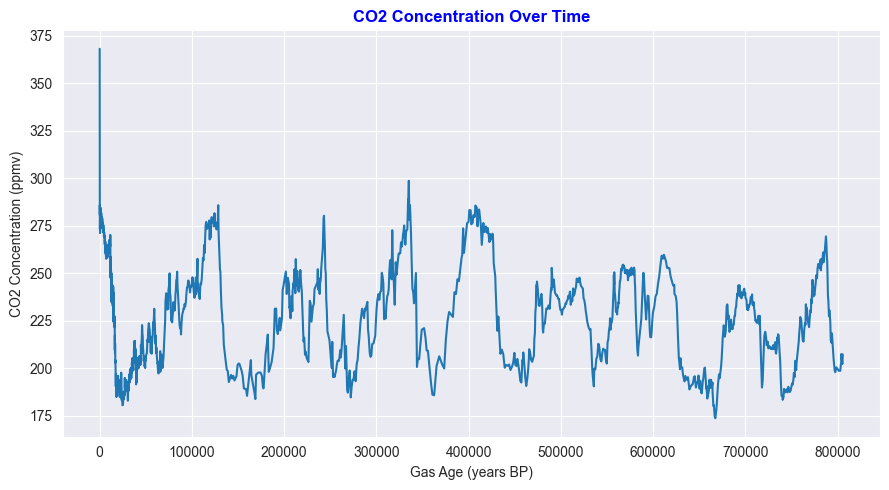

In [694]:
# plot the CO2 (ppmv) vs Gasage (yr BP)

# Set the style
sns.set_style("darkgrid")

# Set the size of the figure
plt.figure(figsize=(9, 5))

# Create the line plot
sns.lineplot(x='ECD3_bp', y='CO2 (ppmv)', data=ber_df)

# Add labels and title
plt.xlabel('Gas Age (years BP)')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('CO2 Concentration Over Time', fontweight='bold', color='blue')

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()



In [695]:
ber_df

,Year,ECD3_bp,CO2 (ppmv),sigma mean CO2 (ppmv)
1,2001,22.970000,368.022488,0.060442
2,1998,26.000000,361.780737,0.370000
3,1996,27.720728,359.647793,0.098000
4,1994,29.594358,357.106740,0.159923
5,1993,30.920000,353.946685,0.043007
...,...,...,...,...
1897,-801975,803999.284376,202.921723,2.064488
1898,-802059,804083.870607,207.498645,0.915083
1899,-802572,804596.674630,204.861938,1.642851
1900,-803182,805206.442334,202.226839,0.689587


In [696]:
# read from IPCC dataser
ipcc_data_co2 = pd.read_excel('data/co2/41586_2008_BFnature06949_MOESM31_ESM.xls', 
                            sheet_name='3.  Composite CO2')

# Create a subset of the DataFrame (selecting all rows starting from the 14th row and all columns)
ipcc_df_co2 = ipcc_data_co2.iloc[5:]

# drop the index columns
ipcc_df_co2 = ipcc_df_co2.reset_index(drop=True)

# use first rows as an header 
ipcc_df_co2.columns = ipcc_df_co2.iloc[0]

# Drop the first row (header row) 
ipcc_df_co2 = ipcc_df_co2.iloc[1:]

ipcc_df_co2

,EDC3_gas_a (yr),CO2 (ppmv)
1,137,280.4
2,268,274.9
3,279,277.9
4,395,279.1
5,404,281.9
...,...,...
1092,794608,199.4
1093,795202,195.2
1094,796467,189.3
1095,797099,188.4


In [697]:
#change the datatype on flaot64 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
ipcc_df_co2 = ipcc_df_co2.astype('float64')

# Remove leading and trailing spaces from column names
ipcc_df_co2.columns = ipcc_df_co2.columns.str.strip()

In [698]:
ipcc_df_co2

,EDC3_gas_a (yr),CO2 (ppmv)
1,137.0,280.4
2,268.0,274.9
3,279.0,277.9
4,395.0,279.1
5,404.0,281.9
...,...,...
1092,794608.0,199.4
1093,795202.0,195.2
1094,796467.0,189.3
1095,797099.0,188.4


In [699]:
# define the current year
current_year = datetime.date.today().year
# add a new columns "Year" showing the corrent year.
ipcc_df_co2['Year'] = 1950 - ipcc_df_co2['EDC3_gas_a (yr)'].astype(int)
# fix the EDC3_gas_a (yr) to express the present as 2023
ipcc_df_co2['EDC3_gas_a (yr)'] = current_year - 1950 + ipcc_df_co2['EDC3_gas_a (yr)']

# reorder columns index 
first_column = ipcc_df_co2.pop('Year') 
ipcc_df_co2.insert(0, 'Year', first_column) 

# sort the value based on the year column 
ipcc_df_co2 = ipcc_df_co2.sort_values(by='Year', ascending=False)
ipcc_df_co2

,Year,EDC3_gas_a (yr),CO2 (ppmv)
1,1813,211.0,280.4
2,1682,342.0,274.9
3,1671,353.0,277.9
4,1555,469.0,279.1
5,1546,478.0,281.9
...,...,...,...
1092,-792658,794682.0,199.4
1093,-793252,795276.0,195.2
1094,-794517,796541.0,189.3
1095,-795149,797173.0,188.4


In [700]:
ipcc_df_co2

,Year,EDC3_gas_a (yr),CO2 (ppmv)
1,1813,211.0,280.4
2,1682,342.0,274.9
3,1671,353.0,277.9
4,1555,469.0,279.1
5,1546,478.0,281.9
...,...,...,...
1092,-792658,794682.0,199.4
1093,-793252,795276.0,195.2
1094,-794517,796541.0,189.3
1095,-795149,797173.0,188.4


In [701]:
# check for duplicate in the columns Gasage (yr BP)
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = ipcc_df_co2.duplicated(['EDC3_gas_a (yr)'], keep=False)
print("Duplicate Value")
print(ipcc_df_co2[duplicate_in_year])

Duplicate Value
0      Year  EDC3_gas_a (yr)  CO2 (ppmv)
532 -407433         409457.0       274.2
531 -407433         409457.0       275.2


In [702]:
#line 532 and 531 are duplicate
# groupby year, EDC3_gas_a (yr) and average the CO2 (ppmv) to remove the duplicate
ipcc_df_co2 = (
    ipcc_df_co2
    .groupby(['Year', 'EDC3_gas_a (yr)'])['CO2 (ppmv)']
    .mean()
    .reset_index()
    .sort_values(by='Year', ascending=False)
)

In [703]:
#reset the index
ipcc_df_co2 = ipcc_df_co2.reset_index(drop=True)

In [704]:
# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(ipcc_df_co2.isnull().sum(), "\n")

# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {ipcc_df_co2.shape[0]}, Columns: {ipcc_df_co2.shape[1]}')

Missing Values
Year               0
EDC3_gas_a (yr)    0
CO2 (ppmv)         0
dtype: int64 

Dataset Shape:
Rows 1095, Columns: 3


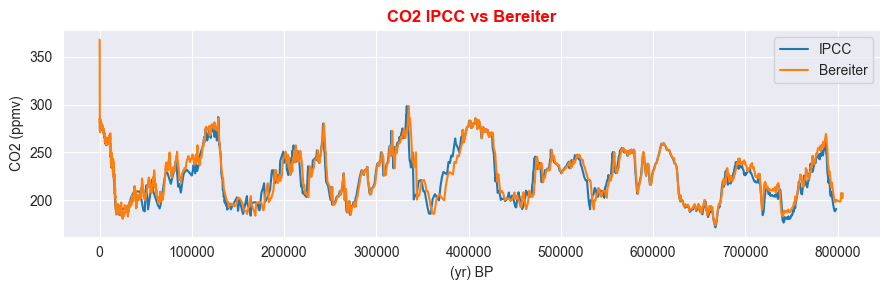

In [705]:
# Set the size of the figure
plt.figure(figsize=(9, 3))

# Create the line plot for IPCC data
sns.lineplot(x='EDC3_gas_a (yr)', y='CO2 (ppmv)', data=ipcc_df_co2, label='IPCC')

# Create the line plot for Bereiter data
sns.lineplot(x='ECD3_bp', y='CO2 (ppmv)', data=ber_df, label='Bereiter')

# Add labels and title
plt.xlabel('(yr) BP')
plt.ylabel('CO2 (ppmv)')
plt.title('CO2 IPCC vs Bereiter', fontweight='bold', color='red')

# Add legend
plt.legend()

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()



In [706]:
# remove last columng of the Bereiter dataser and rename the dataset
co2_df = ber_df.iloc[:, 0:3]
    

In [707]:
co2_df

,Year,ECD3_bp,CO2 (ppmv)
1,2001,22.970000,368.022488
2,1998,26.000000,361.780737
3,1996,27.720728,359.647793
4,1994,29.594358,357.106740
5,1993,30.920000,353.946685
...,...,...,...
1897,-801975,803999.284376,202.921723
1898,-802059,804083.870607,207.498645
1899,-802572,804596.674630,204.861938
1900,-803182,805206.442334,202.226839


In [708]:
# import global co2 mean growth rates of co2 in modern era
# data has bee downloaded from the website https://gml.noaa.gov/ccgg/trends/gl_data.html and added as CSV in the repository

global_co2_moana = pd.read_csv('data\co2\co2_annmean_mlo.csv')

In [709]:
# remove columns not needed 
global_co2_moana = global_co2_moana.iloc[:, 0:2]

global_co2_moana= global_co2_moana.reset_index(drop=True)
# kepp only rows with value from the 1954 ongoing 
global_co2_moana = global_co2_moana.iloc[43:, :]
# drop the index columns 
global_co2_moana = global_co2_moana.reset_index(drop=True)
#set up column name 
global_co2_moana.columns= [ "Year", "C02 (ppm)"]
# Convert the 'C02 (ppm)' column to 'float64'
global_co2_moana['C02 (ppm)'] = global_co2_moana['C02 (ppm)'].astype('float64')
# Convert the 'Year' column to 'int64'
global_co2_moana['Year'] = global_co2_moana['Year'].astype('int64')

In [710]:
global_co2_moana

,Year,C02 (ppm)
0,1959,315.98
1,1960,316.91
2,1961,317.64
3,1962,318.45
4,1963,318.99
...,...,...
59,2018,408.72
60,2019,411.65
61,2020,414.21
62,2021,416.41


In [711]:
global_co2_moana['co2_lag(1)'] = global_co2_moana['C02 (ppm)'].shift(1)

In [712]:
global_co2_moana

,Year,C02 (ppm),co2_lag(1)
0,1959,315.98,NaN
1,1960,316.91,315.98
2,1961,317.64,316.91
3,1962,318.45,317.64
4,1963,318.99,318.45
...,...,...,...
59,2018,408.72,406.76
60,2019,411.65,408.72
61,2020,414.21,411.65
62,2021,416.41,414.21


In [713]:
# calculate increase percentage of co2 for modern era in the moana dataset 

# define current year and last year variable 
current_year_co2 = global_co2_moana['C02 (ppm)']
previous_year_co2 = global_co2_moana['co2_lag(1)']

# create increase column    
global_co2_moana['%_increase'] = (current_year_co2-previous_year_co2) / previous_year_co2

In [714]:
#https://vitalflux.com/pandas-dataframe-how-to-add-rows-columns/
# define the current year
current_year = datetime.date.today().year

for i in range(2002, 2023):
    y = current_year - i
    x = i - 1
    previous_year = co2_df.loc[co2_df["Year"] == x, 'CO2 (ppmv)']
    increase = global_co2_moana.loc[global_co2_moana["Year"] == i, "%_increase"].values[0]
    co2 = previous_year * (1 + increase)
    new_row = pd.DataFrame({'Year': i, 'ECD3_bp': y, 'CO2 (ppmv)': co2})
    co2_df = pd.concat([co2_df, new_row], ignore_index=True)

In [715]:
# sort by year and reset index 
co2_df = co2_df.sort_values(by='Year', ascending=False).reset_index(drop=True)
# check the dataset
co2_df.head(25)

,Year,ECD3_bp,CO2 (ppmv)
0,2022,2.000000,414.813239
1,2021,3.000000,412.712066
2,2020,4.000000,410.531603
3,2019,5.000000,407.994337
4,2018,6.000000,405.090357
5,2017,7.000000,403.147763
6,2016,8.000000,400.818632
7,2015,9.000000,397.448825
8,2014,10.000000,395.268363
9,2013,11.000000,393.216745


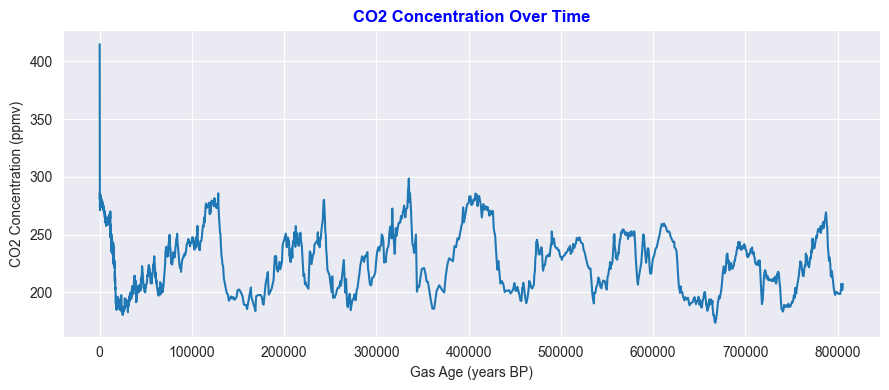

In [716]:
# plot the CO2 (ppmv) vs ECD3_bp

# Set the style
sns.set_style("darkgrid")

# Set the size of the figure
plt.figure(figsize=(9, 4))

# Create the line plot
sns.lineplot(x='ECD3_bp', y='CO2 (ppmv)', data=co2_df)

# Add labels and title
plt.xlabel('Gas Age (years BP)')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('CO2 Concentration Over Time', fontweight='bold', color='blue')

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

In [717]:
# from text to csv - temperature 
# https://www.geeksforgeeks.org/convert-text-file-to-csv-using-python-pandas/
# https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas

noaa_temperature = pd.read_csv("data\Temperature\edc3deuttemp2007.txt", skiprows=91, sep='\s+')


# remve columns not needed from the df for better clarity 
# https://www.statology.org/pandas-keep-columns/
noaa_temperature = noaa_temperature[['Age','Temperature']]

# rename columns for clarity 
columns_to_rename = ['ECD3_age', 'temp_anomality']
noaa_temperature.columns = columns_to_rename



In [718]:
# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(noaa_temperature.isnull().sum(), "\n")

# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {noaa_temperature.shape[0]}, Columns: {noaa_temperature.shape[1]}')

Missing Values
ECD3_age           0
temp_anomality    15
dtype: int64 

Dataset Shape:
Rows 5800, Columns: 2


In [719]:
# drop row with null value 
# https://www.digitalocean.com/community/tutorials/pandas-dropna-drop-null-na-values-from-dataframe
noaa_temperature = noaa_temperature.dropna()

In [720]:
# check for duplicate in the columns Gasage (yr BP)
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = noaa_temperature.duplicated(['ECD3_age'], keep=False)
print("Duplicate Value")
print(noaa_temperature[duplicate_in_year])

Duplicate Value
Empty DataFrame
Columns: [ECD3_age, temp_anomality]
Index: []


In [721]:
# define the current year
current_year = datetime.date.today().year
# add columng age based on year before present equal to 2023 
noaa_temperature['ECD3_bp'] =  current_year - 1950 + noaa_temperature['ECD3_age']
# add a column 'year' to show the year refear about 
noaa_temperature['Year'] = (current_year - (noaa_temperature['ECD3_bp'])).astype(int)
# drop column ECD3_age as redundant 
noaa_temperature = noaa_temperature.drop(columns='ECD3_age')
# reorder columns in the df 
# https://sparkbyexamples.com/pandas/pandas-change-the-order-of-columns/
noaa_temperature = noaa_temperature[['Year','ECD3_bp','temp_anomality']]


In [722]:
# import jouzel data 
jouzel_temperature = pd.read_excel('data\Temperature\epicaDC.deuttemp.EDC3-AICC (3).xls', 
                                   sheet_name='epicaDC.deuttemp.EDC3-AICC.txt')

In [723]:
# keep only relevant columng indicating the age and the temperature 
jouzel_temperature = jouzel_temperature[['EDC3béta','temp']]

# check for duplicate in the columns Gasage (yr BP)
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = jouzel_temperature.duplicated(['EDC3béta'], keep=False)
print("Duplicate Value")
print(jouzel_temperature[duplicate_in_year])


Duplicate Value
Empty DataFrame
Columns: [EDC3béta, temp]
Index: []


In [724]:
# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(jouzel_temperature.isnull().sum(), "\n")

# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {jouzel_temperature.shape[0]}, Columns: {jouzel_temperature.shape[1]}')

Missing Values
EDC3béta    0
temp        0
dtype: int64 

Dataset Shape:
Rows 5819, Columns: 2


In [725]:
# add a column taking as a year before present the the current year 
jouzel_temperature['ECD3_bp'] =  current_year - 1950 + jouzel_temperature['EDC3béta']
# add a column 'year' to show the year refear about 
jouzel_temperature['Year'] = (current_year - (jouzel_temperature['ECD3_bp'])).astype(int)
# change the temperature column from kelvin to celsiu
jouzel_temperature['temp'] = jouzel_temperature['temp'] - 273.15


In [726]:
# drop column ECD3beta as redundant 
jouzel_temperature = jouzel_temperature.drop(columns='EDC3béta')
# reorder columns in the df 
# https://sparkbyexamples.com/pandas/pandas-change-the-order-of-columns/
jouzel_temperature = jouzel_temperature[['Year','ECD3_bp','temp']]

In [727]:
jouzel_temperature

,Year,ECD3_bp,temp
0,2000,24.00000,-54.85
1,1993,30.44023,-54.85
2,1987,36.55981,-54.85
3,1981,42.35844,-54.85
4,1974,49.44722,-54.85
...,...,...,...
5814,-814921,816945.60000,-62.15
5815,-815743,817767.60000,-61.95
5816,-816555,818579.50000,-61.85
5817,-817353,819377.10000,-61.75


For the present year I find multiple dataset online that show temperature anomalities for the current era, but all of them take as mean for calculate the anomality a different time frame from 1951  to 1980. Example are [here []](https://www.temperaturerecord.org/#sources)) and [here []](https://berkeleyearth.org/temperature-region/antarctica) This will calculate a discrepency.

The only dataset i was able to find was sourced [here []](https://en.tutiempo.net/climate/ws-898280.html) and are observation taken on the artatica station DOME C II The location of the station is not exactly the same of the EPICA DOME C, who the above data refer, and this can create discrepancy. However this is the only dataset i was able to find showing average per year that i can use to calculate the temporature anomalyties and should not be very distant as per the [antartic stations avaiable []](https://en.wikipedia.org/wiki/Research_stations_in_Antarctica#:~:text=The%20United%20States%20maintains%20the%20southernmost%20base%2C%20Amundsen%E2%80%93Scott,Vostok%20Station%20at%2078%C2%B027%E2%80%B250%E2%80%B3S%20during%20the%20winter%20season.).

As the overallapping years doesn't match the temperature, I decide to calculate the % of increase and apply it to the dataset to obtein the "estimated temperature".

In [728]:
# create a dataset with the data from the 2000 to the 2022 from the website 
# https://en.tutiempo.net/climate/ws-898280.html

# Assuming 'temp_until_2022' is your dictionary
temp_until_2022 = {
    'Year': [2000, 2001, 2003, 2004, 2010, 2011, 2012, 2013, 2014, 2017, 2018, 2019, 2020, 2022],
    'temp': [-51.1, -50.9, -51.9, -50.4, -52.6, -50.2, -51.8, -50.9, -51.3, -51.3, -51.1, -50.2, -50.3, -49.9]
}

# Create a DataFrame from the dictionary
temp_until_2022_df = pd.DataFrame(temp_until_2022)

# define current year
current_year = datetime.date.today().year

# create the column ECD3_bp referring to the year before the present
temp_until_2022_df['ECD3_bp'] = current_year - temp_until_2022_df['Year']

# add log1 column for the temp
temp_until_2022_df['log1_temp'] = temp_until_2022_df['temp'].shift(1)

# create the '%_increase' column
temp_until_2022_df['%_increase'] = (temp_until_2022_df['temp'] - temp_until_2022_df['log1_temp']) / temp_until_2022_df['log1_temp']

# Display the resulting DataFrame
temp_until_2022_df



,Year,temp,ECD3_bp,log1_temp,%_increase
0,2000,-51.1,24,NaN,NaN
1,2001,-50.9,23,-51.1,-0.003914
2,2003,-51.9,21,-50.9,0.019646
3,2004,-50.4,20,-51.9,-0.028902
4,2010,-52.6,14,-50.4,0.043651
5,2011,-50.2,13,-52.6,-0.045627
6,2012,-51.8,12,-50.2,0.031873
7,2013,-50.9,11,-51.8,-0.017375
8,2014,-51.3,10,-50.9,0.007859
9,2017,-51.3,7,-51.3,-0.000000


In [729]:
# list of the annual observation avaiable 
year_until_2022 = [2001, 2003, 2004, 2010, 2011, 2012, 2013, 2014, 2017, 2018, 2019, 2020, 2022]


for i in year_until_2022:
    y = 2024 - i
    x = temp_until_2022_df['Year'].shift(1).loc[temp_until_2022_df['Year'] == i].values[0]
    
    # Extract the previous year's temperature value
    previous_year_temp = jouzel_temperature.loc[jouzel_temperature["Year"] == x, 'temp'].values[0]
    
    # Extract the percentage increase from another DataFrame (global_co2_moana)
    increase = temp_until_2022_df.loc[temp_until_2022_df["Year"] == i, "%_increase"].values[0]
    
    # Calculate the new temperature value
    new_temp = previous_year_temp * (1 + increase)
    
    # Create a new row DataFrame
    new_row = pd.DataFrame({'Year': [i], 'ECD3_bp': [y], 'temp': [new_temp]})
    
    # Concatenate the new row to the existing DataFrame
    jouzel_temperature = pd.concat([jouzel_temperature, new_row], ignore_index=True)
    
# sort by year 
jouzel_temperature = jouzel_temperature.sort_values('Year', ascending=False).reset_index(drop=True)

In [730]:
#calculate the temperature anomality 
# calculate the mean of aproximately the last 1000 year - not considerating the added lines
mean_jouzel = jouzel_temperature['temp'][12:226].mean()
#create a temp anomaly columng 
jouzel_temperature['temp_anomality'] = jouzel_temperature['temp'] - mean_jouzel

In [731]:
jouzel_temperature

,Year,ECD3_bp,temp,temp_anomality
0,2022,2.0,-53.561937,2.209957
1,2020,4.0,-53.991292,1.780602
2,2019,5.0,-53.883953,1.887941
3,2018,6.0,-54.850000,0.921894
4,2017,7.0,-55.064677,0.707217
...,...,...,...,...
5827,-814921,816945.6,-62.150000,-6.378106
5828,-815743,817767.6,-61.950000,-6.178106
5829,-816555,818579.5,-61.850000,-6.078106
5830,-817353,819377.1,-61.750000,-5.978106


In [732]:
jouzel_temperature.loc[jouzel_temperature['Year'] == 1911]
jouzel_temperature.to_csv('jousel_temperature.csv')

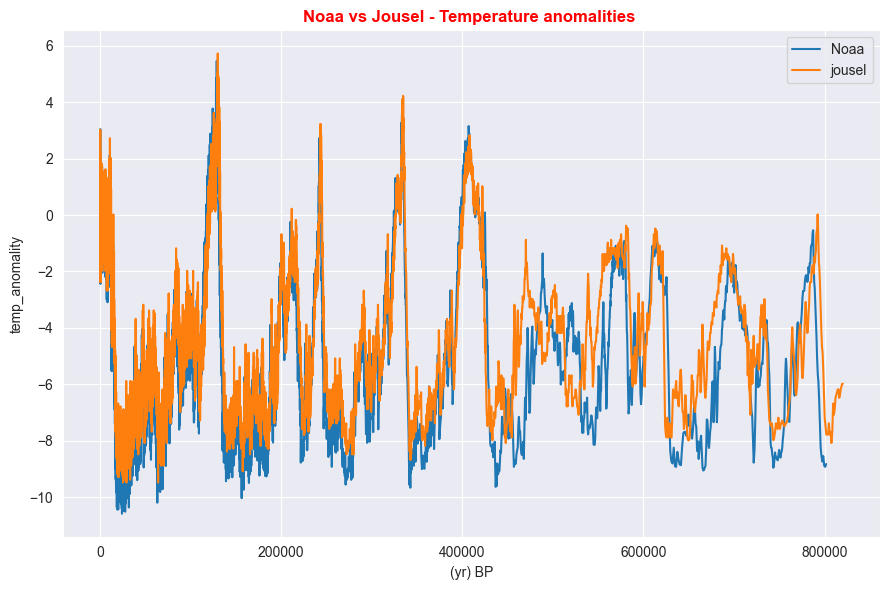

In [733]:
# plot the 2 dataset toghethere to determinate what to use 

# Set the size of the figure
plt.figure(figsize=(9, 6))

# Create the line plot for noaa temp data
sns.lineplot(x='ECD3_bp', y='temp_anomality', data=noaa_temperature, label='Noaa')

# Create the line plot for Bereiter data
sns.lineplot(x='ECD3_bp', y='temp_anomality', data=jouzel_temperature, label='jousel')

# Add labels and title
plt.xlabel('(yr) BP')
plt.ylabel('temp_anomality')
plt.title('Noaa vs Jousel - Temperature anomalities ', fontweight='bold', color='red')

# Add legend
plt.legend()

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

Examining the below graph, it look both the dataset are similar unit 40000 yearf before present and after they show some discrepancies. 

I assume the discrepancy is due to the difficult to have accurate observation for acient time. 

Both the dataset has similar size but the noa dataset has data until the 1911, in opposite with the Jouzel dataset that has data until the year 2000. As the size of the 2 similar, and considering the first 40000 years before present have similar result, I have decided to keep the noa dataset, that show the anomalities already calculated and, due to that, is more realible, and add the year from 1911 to 2000 of the Jozel dataset. 

In [734]:
# define the jozel section to be appen 
jouzel_to_append = jouzel_temperature.loc[:11, ['Year', 'ECD3_bp', 'temp_anomality']]
jouzel_to_append

,Year,ECD3_bp,temp_anomality
0,2022,2.0,2.209957
1,2020,4.0,1.780602
2,2019,5.0,1.887941
3,2018,6.0,0.921894
4,2017,7.0,0.707217
5,2014,10.0,0.707217
6,2013,11.0,1.136571
7,2012,12.0,0.170524
8,2011,13.0,1.887941
9,2010,14.0,-0.688184


In [735]:
# create the temperature dataset as fuse between the noaa and jouzel dataset 
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/

temp_anomality_df = pd.concat([noaa_temperature, jouzel_to_append], ignore_index=True, axis=0)

# sort bsed on year and reset index 
temp_anomality_df = temp_anomality_df.sort_values('Year', ascending=False).reset_index(drop=True)

In [736]:
temp_anomality_df.head(30)

,Year,ECD3_bp,temp_anomality
0,2022,2.00000,2.209957
1,2020,4.00000,1.780602
2,2019,5.00000,1.887941
3,2018,6.00000,0.921894
4,2017,7.00000,0.707217
5,2014,10.00000,0.707217
6,2013,11.00000,1.136571
7,2012,12.00000,0.170524
8,2011,13.00000,1.887941
9,2010,14.00000,-0.688184


In [737]:
temp_until_2022_df

,Year,temp,ECD3_bp,log1_temp,%_increase
0,2000,-51.1,24,NaN,NaN
1,2001,-50.9,23,-51.1,-0.003914
2,2003,-51.9,21,-50.9,0.019646
3,2004,-50.4,20,-51.9,-0.028902
4,2010,-52.6,14,-50.4,0.043651
5,2011,-50.2,13,-52.6,-0.045627
6,2012,-51.8,12,-50.2,0.031873
7,2013,-50.9,11,-51.8,-0.017375
8,2014,-51.3,10,-50.9,0.007859
9,2017,-51.3,7,-51.3,-0.000000


In [738]:
co2_df

,Year,ECD3_bp,CO2 (ppmv)
0,2022,2.000000,414.813239
1,2021,3.000000,412.712066
2,2020,4.000000,410.531603
3,2019,5.000000,407.994337
4,2018,6.000000,405.090357
...,...,...,...
1917,-801975,803999.284376,202.921723
1918,-802059,804083.870607,207.498645
1919,-802572,804596.674630,204.861938
1920,-803182,805206.442334,202.226839


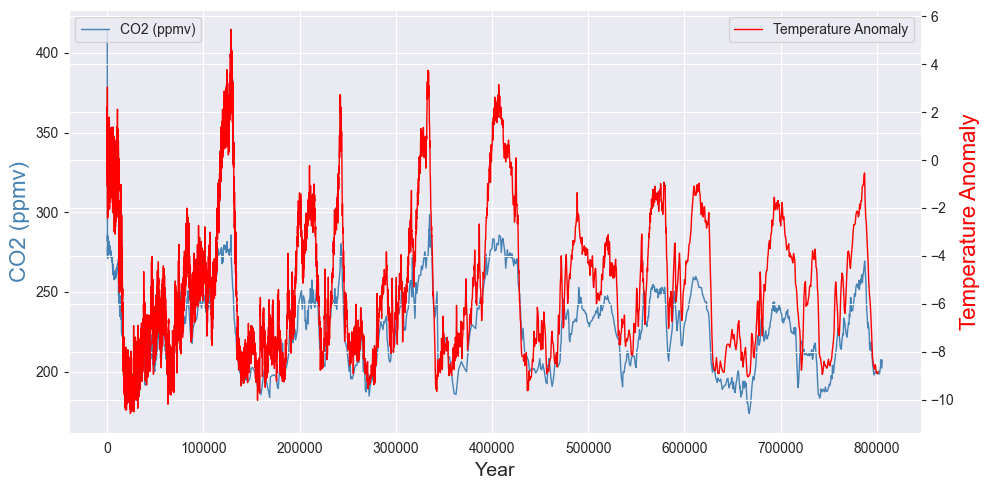

In [739]:
# Define colors to use
col1 = 'steelblue'
col2 = 'red'

# Define subplots with a larger figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Add the first line to the plot with a thinner line and no markers
ax.plot(co2_df['ECD3_bp'], co2_df['CO2 (ppmv)'], color=col1, linewidth=1, label='CO2 (ppmv)')

# Add x-axis label
ax.set_xlabel('Year', fontsize=14)

# Add y-axis label for the first y-axis
ax.set_ylabel('CO2 (ppmv)', color=col1, fontsize=16)

# Create a legend for the first line
ax.legend(loc='upper left')

# Define the second y-axis that shares the x-axis with the current plot
ax2 = ax.twinx()

# Add the second line to the plot with a thinner line and no markers
ax2.plot(temp_anomality_df['ECD3_bp'], temp_anomality_df['temp_anomality'], color=col2, linewidth=1, label='Temperature Anomaly')

# Add y-axis label for the second y-axis
ax2.set_ylabel('Temperature Anomaly', color=col2, fontsize=16)

# Create a legend for the second line
ax2.legend(loc='upper right')

# Adjust layout to prevent clipping of labels
fig.tight_layout()

# Show the plot
plt.show()

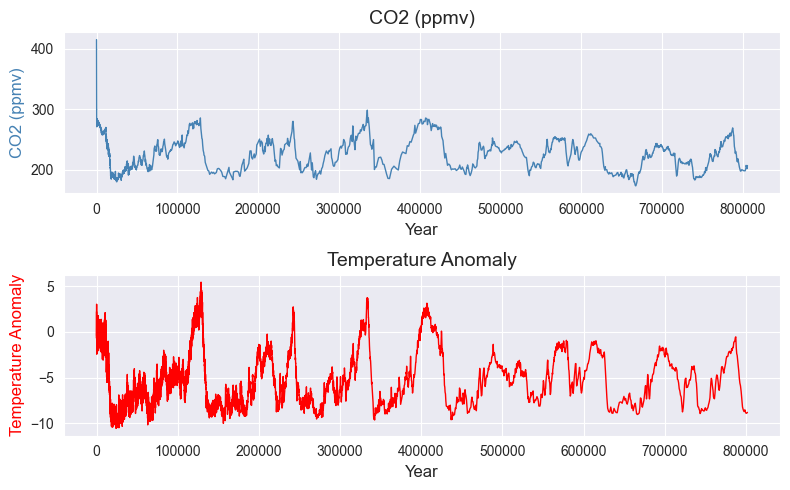

In [740]:
import matplotlib.pyplot as plt

# Define colors to use
col1 = 'steelblue'
col2 = 'red'

# Define subplots with a 2x1 grid and a smaller figure size
fig, axs = plt.subplots(2, 1, figsize=(8, 5))

# Plot the first line on the first subplot (axs[0])
axs[0].plot(co2_df['ECD3_bp'], co2_df['CO2 (ppmv)'], color=col1, linewidth=1)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('CO2 (ppmv)', color=col1, fontsize=12)
axs[0].set_title('CO2 (ppmv)', fontsize=14)

# Plot the second line on the second subplot (axs[1])
axs[1].plot(temp_anomality_df['ECD3_bp'], temp_anomality_df['temp_anomality'], color=col2, linewidth=1)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Temperature Anomaly', color=col2, fontsize=12)
axs[1].set_title('Temperature Anomaly', fontsize=14)

# Adjust layout to prevent clipping of labels
fig.tight_layout()

# Show the plot
plt.show()

In [741]:
temp_anomality_df

,Year,ECD3_bp,temp_anomality
0,2022,2.0,2.209957
1,2020,4.0,1.780602
2,2019,5.0,1.887941
3,2018,6.0,0.921894
4,2017,7.0,0.707217
...,...,...,...
5792,-795458,797482.0,-8.730000
5793,-796493,798517.0,-8.540000
5794,-797551,799575.0,-8.880000
5795,-798639,800663.0,-8.920000


# ch4

https://www.methanelevels.org/#sources

In [742]:
# text to csv - methane  - from 800.000 to 1000 years ago 
epica_domec_800yr_ch4 = pd.read_csv("data\methane\edc-ch4-2008.txt", skiprows=153, sep='\s+')

# remve columns not needed from the df for better clarity 
# https://www.statology.org/pandas-keep-columns/
epica_domec_800yr_ch4 = epica_domec_800yr_ch4[['Gas','Age']]

# rename columns for clarity 
columns_to_rename = ['ECD3_age', 'CH4_ppb']
epica_domec_800yr_ch4.columns = columns_to_rename

# define the current year
current_year = datetime.date.today().year
# add columng age based on year before present equal to 2023 
epica_domec_800yr_ch4['ECD3_bp'] =  current_year - 1950 + epica_domec_800yr_ch4['ECD3_age']
# add a column 'year' to show the year refear about 
epica_domec_800yr_ch4['Year'] = (current_year - (epica_domec_800yr_ch4['ECD3_bp'])).astype(int)
# drop column ECD3_age as redundant 
epica_domec_800yr_ch4 = epica_domec_800yr_ch4.drop(columns='ECD3_age')
# reorder columns in the df 
# https://sparkbyexamples.com/pandas/pandas-change-the-order-of-columns/
epica_domec_800yr_ch4 = epica_domec_800yr_ch4[['Year','ECD3_bp','CH4_ppb']]

In [743]:
# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {epica_domec_800yr_ch4.shape[0]}, Columns: {epica_domec_800yr_ch4.shape[1]}')

# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(epica_domec_800yr_ch4.isnull().sum(), "\n")

Dataset Shape:
Rows 2103, Columns: 3
Missing Values
Year       0
ECD3_bp    0
CH4_ppb    0
dtype: int64 



from 1000 to 1980 

In [744]:
ch4_until1980 = pd.read_csv('data\methane\law_ch4.txt', skiprows= 333, nrows=195, sep='\s+')

# remve columns not needed from the df for better clarity 
# https://www.statology.org/pandas-keep-columns/
ch4_until1980 = ch4_until1980[['year','AD']]

# rename columns for clarity 
columns_to_rename = ['Year', 'CH4_ppb']
ch4_until1980.columns = columns_to_rename

# define the current year
current_year = datetime.date.today().year
# add columng age based on year before present equal to 2023 
ch4_until1980['ECD3_bp'] =  current_year - ch4_until1980['Year']
# reorder columns in the df 
# https://sparkbyexamples.com/pandas/pandas-change-the-order-of-columns/
ch4_until1980 = ch4_until1980[['Year','ECD3_bp','CH4_ppb']]

In [745]:
ch4_until1980

,Year,ECD3_bp,CH4_ppb
0,1010,1014,667.1
1,1015,1009,668.7
2,1020,1004,670.3
3,1025,999,671.8
4,1030,994,673.1
...,...,...,...
190,1960,64,1211.1
191,1965,59,1272.1
192,1970,54,1339.8
193,1975,49,1410.7


In [746]:
# check for duplicate in the columns ECD3_bp
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = ch4_until1980.duplicated(['ECD3_bp'], keep=False)
print(ch4_until1980[duplicate_in_year])

Empty DataFrame
Columns: [Year, ECD3_bp, CH4_ppb]
Index: []


In [747]:
# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {ch4_until1980.shape[0]}, Columns: {ch4_until1980.shape[1]}')

# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(ch4_until1980.isnull().sum(), "\n")

Dataset Shape:
Rows 195, Columns: 3
Missing Values
Year       0
ECD3_bp    0
CH4_ppb    0
dtype: int64 



In [748]:
ch4_until1980

,Year,ECD3_bp,CH4_ppb
0,1010,1014,667.1
1,1015,1009,668.7
2,1020,1004,670.3
3,1025,999,671.8
4,1030,994,673.1
...,...,...,...
190,1960,64,1211.1
191,1965,59,1272.1
192,1970,54,1339.8
193,1975,49,1410.7


from 1984 to 2022

In [749]:
# text to csv - methane  - from 1980 to 2022
noa_ch4_until2022 = pd.read_csv("data\methane\ch4_annmean_gl.txt", 
                                skiprows=46, 
                                sep='\s+',
                                names = ['Year', 'CH4_ppb', 'unc'])


# remve columns not needed from the df for better clarity 
noa_ch4_until2022 = noa_ch4_until2022[['Year', 'CH4_ppb']]

# define the current year
current_year = datetime.date.today().year
# add columng age based on year before present equal to 2023 
noa_ch4_until2022['ECD3_bp'] =  current_year - noa_ch4_until2022['Year']
# reorder columns in the df 
# https://sparkbyexamples.com/pandas/pandas-change-the-order-of-columns/
noa_ch4_until2022 = noa_ch4_until2022[['Year','ECD3_bp','CH4_ppb']]

In [750]:
noa_ch4_until2022

,Year,ECD3_bp,CH4_ppb
0,1984,40,1644.85
1,1985,39,1657.29
2,1986,38,1670.09
3,1987,37,1682.70
4,1988,36,1693.28
5,1989,35,1704.53
6,1990,34,1714.43
7,1991,33,1724.78
8,1992,32,1735.47
9,1993,31,1736.53


Fuse the 3 dataset toghether based on ECD3_bp

#co2_temp_composite = co2_df.merge(temp_anomality_df, how="outer", on='Year')
temp_anomality_df = pd.concat([noaa_temperature, jouzel_to_append, noa_ch4_until2022], ignore_index=True, axis=0)

In [751]:
full_ch4 = pd.concat([epica_domec_800yr_ch4,ch4_until1980, noa_ch4_until2022], ignore_index=True, axis=0)
full_ch4 = full_ch4.sort_values(by="ECD3_bp", ascending=False).reset_index(drop=True)

In [752]:
# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {full_ch4.shape[0]}, Columns: {full_ch4.shape[1]}')

# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(full_ch4.isnull().sum(), "\n")

Dataset Shape:
Rows 2337, Columns: 3
Missing Values
Year       0
ECD3_bp    0
CH4_ppb    0
dtype: int64 



In [753]:
# check for duplicate in the columns ECD3_bp
# https://www.statology.org/pandas-find-duplicates/
# Check for duplicates in the "ECD3_bp" column
duplicate_in_year = full_ch4['Year'].duplicated(keep=False)

# Print rows with duplicate values in the "ECD3_bp" column
print(full_ch4[duplicate_in_year])

      Year  ECD3_bp  CH4_ppb
2212  1605      419    669.7
2213  1605      419    651.0
2262  1820      204    744.7
2263  1820      204    762.0


In [754]:
full_ch4 = full_ch4.groupby(['Year','ECD3_bp'])['CH4_ppb'].mean().reset_index()

In [755]:
full_ch4

,Year,ECD3_bp,CH4_ppb
0,-797446,799470,399.00
1,-796467,798491,458.00
2,-795327,797351,396.00
3,-794370,796394,418.00
4,-792988,795012,428.00
...,...,...,...
2330,2018,6,1857.33
2331,2019,5,1866.58
2332,2020,4,1878.93
2333,2021,3,1895.28


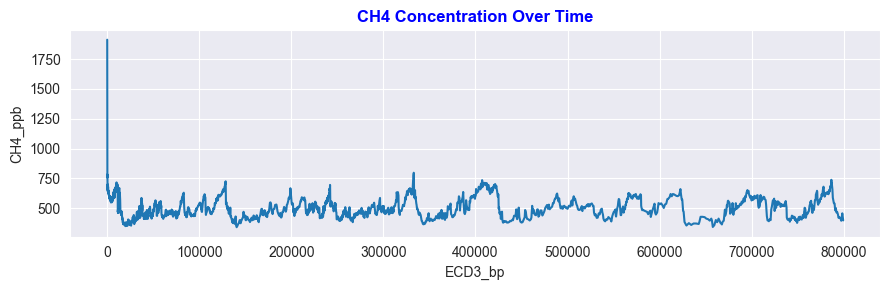

In [756]:
# plot the CO2 (ppmv) vs ECD3_bp

# Set the style
sns.set_style("darkgrid")

# Set the size of the figure
plt.figure(figsize=(9, 3))

# Create the line plot
sns.lineplot(x='ECD3_bp', y='CH4_ppb', data=full_ch4)

# Add labels and title
plt.xlabel('ECD3_bp')
plt.ylabel('CH4_ppb')
plt.title('CH4 Concentration Over Time', fontweight='bold', color='blue')

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

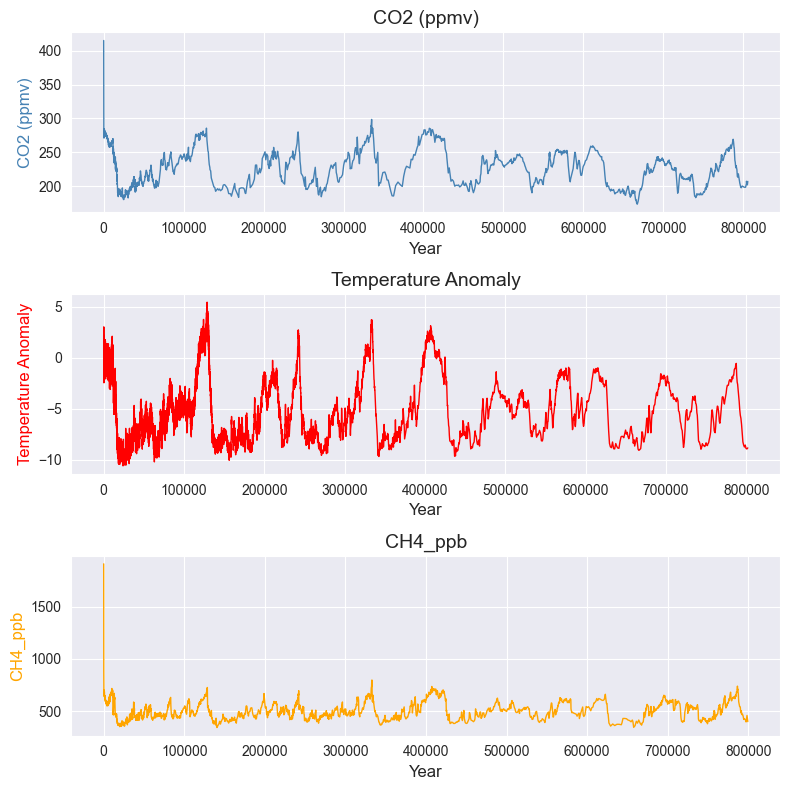

In [757]:
# Define colors to use
col1 = 'steelblue'
col2 = 'red'
col3 = 'orange'

# Define subplots with a 3x1 grid and a smaller figure size
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# Plot the first line on the first subplot (axs[0])
axs[0].plot(co2_df['ECD3_bp'], co2_df['CO2 (ppmv)'], color=col1, linewidth=1)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('CO2 (ppmv)', color=col1, fontsize=12)
axs[0].set_title('CO2 (ppmv)', fontsize=14)

# Plot the second line on the second subplot (axs[1])
axs[1].plot(temp_anomality_df['ECD3_bp'], temp_anomality_df['temp_anomality'], color=col2, linewidth=1)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Temperature Anomaly', color=col2, fontsize=12)
axs[1].set_title('Temperature Anomaly', fontsize=14)

# Plot the third line on the third subplot (axs[2])
axs[2].plot(full_ch4['ECD3_bp'], full_ch4['CH4_ppb'], color=col3, linewidth=1)  # Change 'Column_X' to the desired column
axs[2].set_xlabel('Year', fontsize=12)
axs[2].set_ylabel('CH4_ppb', color=col3, fontsize=12)  # Change 'Column_X Label' to the desired label
axs[2].set_title('CH4_ppb', fontsize=14)  # Change 'Column_X Title' to the desired title

# Adjust layout to prevent clipping of labels
fig.tight_layout()

# Show the plot
plt.show()

# fuse the dataset 

The porpuse of this section is

In [758]:
# group the co2_df dataset based on year to remove duplicate 
co2_df_to_merge = co2_df.groupby('Year')['CO2 (ppmv)'].mean().reset_index()
# group the temp_anomality_df dataset based on year to remove duplicate 
temp_anomality_df_to_merge = temp_anomality_df.groupby('Year')['temp_anomality'].mean().reset_index()
# group the temp_anomality_df dataset based on year to remove duplicate 
full_ch4_to_merge = full_ch4.groupby('Year')['CH4_ppb'].mean().reset_index()

In [759]:
temp_anomality_df_to_merge

,Year,temp_anomality
0,-799712,-8.820000
1,-798639,-8.920000
2,-797551,-8.880000
3,-796493,-8.540000
4,-795458,-8.730000
...,...,...
5792,2017,0.707217
5793,2018,0.921894
5794,2019,1.887941
5795,2020,1.780602


In [760]:
# merge the dataframe on columns years 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

# Merge temp df with co2 dataframe
temp_co2_df = temp_anomality_df_to_merge.merge(co2_df_to_merge, how='outer', on='Year').reset_index(drop=True)

# Merge temp_co2_df with ch4 df
temp_co2_ch4_df = temp_co2_df.merge(full_ch4_to_merge, how='outer', on='Year').reset_index(drop=True)

# Order df by years in descending order
temp_co2_ch4_df = temp_co2_ch4_df.sort_values('Year', ascending=False).reset_index(drop=True)

In [761]:
temp_co2_ch4_df.head(100)


,Year,temp_anomality,CO2 (ppmv),CH4_ppb
0,2022,2.209957,414.813239,1911.83
1,2021,NaN,412.712066,1895.28
2,2020,1.780602,410.531603,1878.93
3,2019,1.887941,407.994337,1866.58
4,2018,0.921894,405.090357,1857.33
...,...,...,...,...
95,1911,0.880000,298.106247,NaN
96,1910,NaN,297.869107,903.10
97,1909,NaN,301.504135,NaN
98,1906,NaN,298.659559,NaN


In [762]:
# Interpolate NaN values using 'time' method
temp_co2_ch4_df.interpolate(method='linear', inplace=True)

# Reset the index if needed
temp_co2_ch4_df.reset_index(drop=True)

# Create a column ECD3_br to represent the year before present 
# define the current year
current_year = datetime.date.today().year

# add columng age based on year before present equal to 2023 
temp_co2_ch4_df['ECD3_bp'] =  current_year- temp_co2_ch4_df['Year']

#reorder columns 
temp_co2_ch4_df.reindex(columns=['Year',	'ECD3_bp', 'temp_anomality',	'CO2 (ppmv)',	'CH4_ppb'])

,Year,ECD3_bp,temp_anomality,CO2 (ppmv),CH4_ppb
0,2022,2,2.209957,414.813239,1911.83
1,2021,3,1.995280,412.712066,1895.28
2,2020,4,1.780602,410.531603,1878.93
3,2019,5,1.887941,407.994337,1866.58
4,2018,6,0.921894,405.090357,1857.33
...,...,...,...,...,...
9797,-801975,803999,-8.820000,202.921723,399.00
9798,-802059,804083,-8.820000,207.498645,399.00
9799,-802572,804596,-8.820000,204.861938,399.00
9800,-803182,805206,-8.820000,202.226839,399.00


In [763]:
temp_co2_ch4_df.to_csv('temp_co2_ch4_df.csv')

PermissionError: [Errno 13] Permission denied: 'temp_co2_ch4_df.csv'

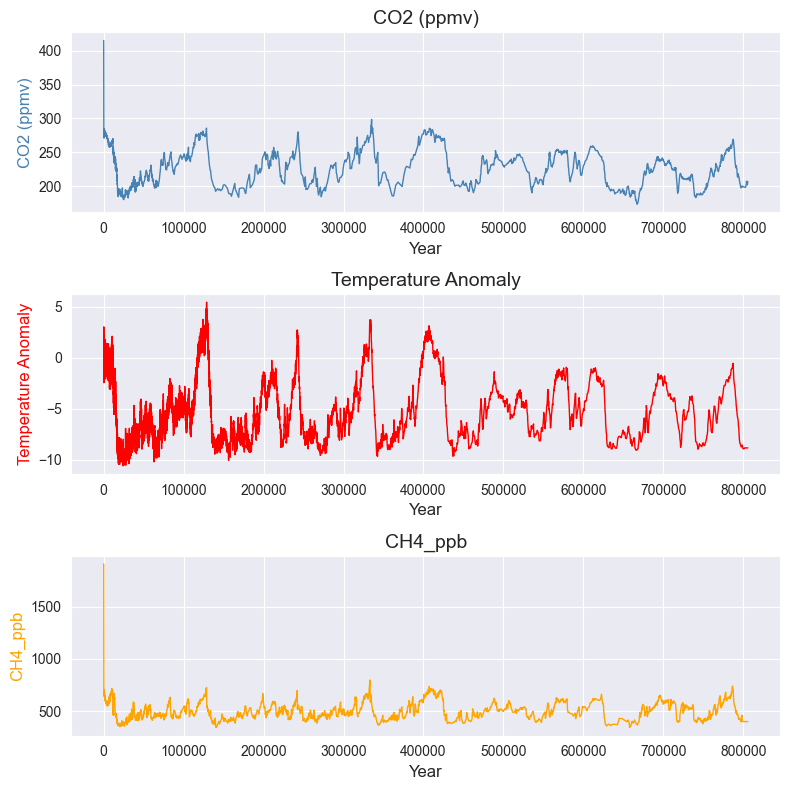

In [ ]:
# Define colors to use
col1 = 'steelblue'
col2 = 'red'
col3 = 'orange'

# Define subplots with a 3x1 grid and a smaller figure size
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# Plot the first line on the first subplot (axs[0])
axs[0].plot(temp_co2_ch4_df['ECD3_bp'], temp_co2_ch4_df['CO2 (ppmv)'], color=col1, linewidth=1)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('CO2 (ppmv)', color=col1, fontsize=12)
axs[0].set_title('CO2 (ppmv)', fontsize=14)

# Plot the second line on the second subplot (axs[1])
axs[1].plot(temp_co2_ch4_df['ECD3_bp'], temp_co2_ch4_df['temp_anomality'], color=col2, linewidth=1)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Temperature Anomaly', color=col2, fontsize=12)
axs[1].set_title('Temperature Anomaly', fontsize=14)

# Plot the third line on the third subplot (axs[2])
axs[2].plot(temp_co2_ch4_df['ECD3_bp'], temp_co2_ch4_df['CH4_ppb'], color=col3, linewidth=1)  # Change 'Column_X' to the desired column
axs[2].set_xlabel('Year', fontsize=12)
axs[2].set_ylabel('CH4_ppb', color=col3, fontsize=12)  # Change 'Column_X Label' to the desired label
axs[2].set_title('CH4_ppb', fontsize=14)  # Change 'Column_X Title' to the desired title

# Adjust layout to prevent clipping of labels
fig.tight_layout()

# Show the plot
plt.show()

# prediction 

https://datascience.stackexchange.com/questions/50829/predicting-yearly-income-with-linear-regression-using-python
https://www.nickmccullum.com/python-machine-learning/linear-regression-python/
https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/
https://www.analyticsvidhya.com/blog/2022/06/time-series-forecasting-using-python/

In [764]:
#import nasa dataset for consistency and affiidability of the prevision of modern era estimation 
# https://climate.nasa.gov/vital-signs/global-temperature/
# https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt
# https://www.temperaturerecord.org/#sources

nasa_temp_anom_until_1880 = pd.read_csv('data\\Temperature\\nasa_until1880.txt', skiprows=3, sep='\s+', )
# drop first row 
# https://stackoverflow.com/questions/43136137/drop-a-specific-row-in-pandas
nasa_temp_anom_until_1880 = nasa_temp_anom_until_1880.drop(0).reset_index(drop=True)
# keep only relevant columns 
nasa_temp_anom_until_1880 = nasa_temp_anom_until_1880[['Year','No_Smoothing']] 
# rename columns
nasa_temp_anom_until_1880.columns=['Year','temp_anomaly']
nasa_temp_anom_until_1880['Year']=nasa_temp_anom_until_1880['Year'].astype(int)

nasa_temp_anom_until_1880



,Year,temp_anomaly
0,1880,-0.17
1,1881,-0.09
2,1882,-0.11
3,1883,-0.18
4,1884,-0.28
...,...,...
138,2018,0.85
139,2019,0.98
140,2020,1.02
141,2021,0.85


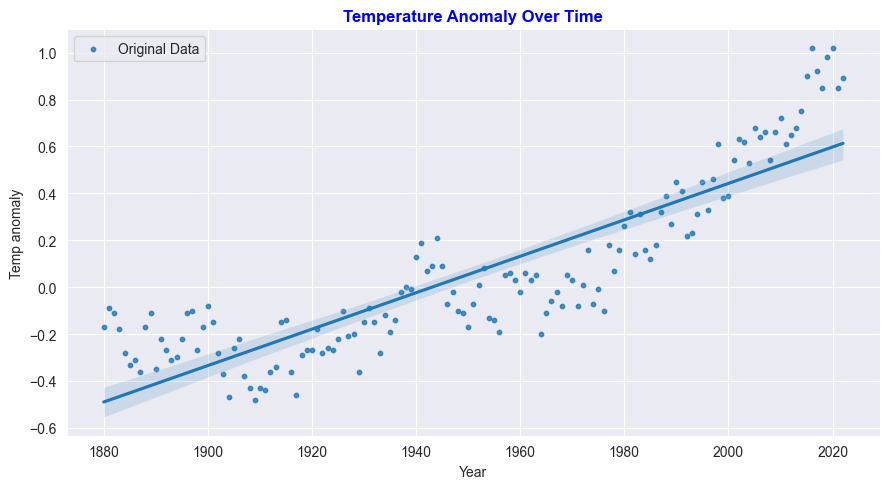

In [768]:
# plot the CO2 (ppmv) vs Gasage (yr BP)

# Set the size of the figure
plt.figure(figsize=(9, 5))

# Create the scatter plot with a regression line
# https://stackoverflow.com/questions/53257382/what-do-scatter-kws-and-line-kws-do-in-seaborn-lmplot
sns.regplot(x='Year', y='temp_anomaly', data=nasa_temp_anom_until_1880, scatter_kws={'s': 10}, label='Original Data')


plt.xlabel('Year')
plt.ylabel('Temp anomaly')
plt.title('Temperature Anomaly Over Time', fontweight='bold', color='blue')
plt.legend()

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

In [769]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming 'Year' and 'temp_anomaly' are the correct column names in your DataFrame
x = nasa_temp_anom_until_1880[['Year']]
y = nasa_temp_anom_until_1880['temp_anomaly']  # Removed extra brackets around 'temp_anomaly'

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

# Evaluate the regression model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, predictions, squared=False))





Mean Absolute Error: 0.13530023101636363
Mean Squared Error: 0.026578753701368373
Root Mean Squared Error: 0.16302991658394594


In [781]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'Year' and 'temp_anomaly' are the correct column names in your DataFrame
x = nasa_temp_anom_until_1880[['Year']]
y = nasa_temp_anom_until_1880['temp_anomaly']  # Removed extra brackets around 'temp_anomaly'

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
predictions_test = model.predict(x_test)

# Extend 'Year' for the next 30 years
future_years = np.arange(1880, 2060).reshape(-1, 1)

# Make predictions for the future 30 years
predictions_future = model.predict(future_years)

# Evaluate the regression model on the test set
print('Mean Absolute Error (Test Set):', metrics.mean_absolute_error(y_test, predictions_test))
print('Mean Squared Error (Test Set):', metrics.mean_squared_error(y_test, predictions_test))
print('Root Mean Squared Error (Test Set):', metrics.mean_squared_error(y_test, predictions_test, squared=False))

# Create a DataFrame for future predictions
future_predictions_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted_Temp_Anomaly': predictions_future
})

future_predictions_df['Year'] = future_predictions_df['Year'].astype(int)



Mean Absolute Error (Test Set): 0.13530023101636363
Mean Squared Error (Test Set): 0.026578753701368373
Root Mean Squared Error (Test Set): 0.16302991658394594


c:\Users\anton\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


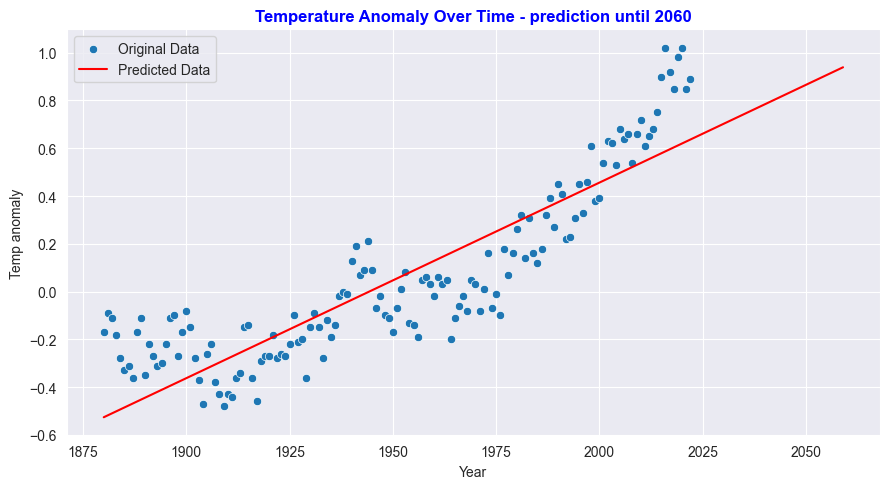

In [783]:

# Set the size of the figure
plt.figure(figsize=(9, 5))

# Create the scatter plot for historical data without a regression line
sns.scatterplot(x='Year', y='temp_anomaly', data=nasa_temp_anom_until_1880, label='Original Data')

# Create a line plot for predicted data
sns.lineplot(x='Year', y='Predicted_Temp_Anomaly', data=future_predictions_df, label='Predicted Data', color='red')

plt.xlabel('Year')
plt.ylabel('Temp anomaly')
plt.title('Temperature Anomaly Over Time - prediction until 2060', fontweight='bold', color='blue')
plt.legend()

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

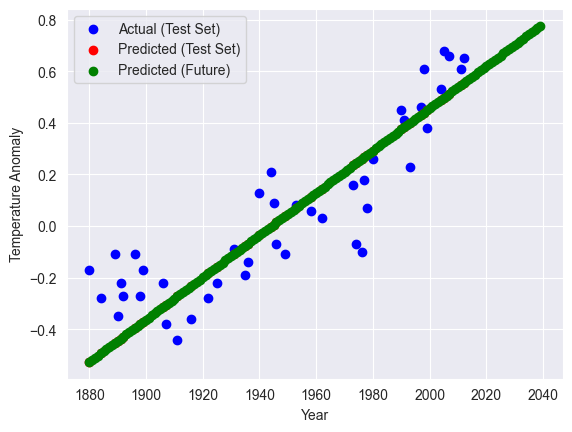

In [773]:
# Plotting actual, predicted values for the test set, and future predictions
plt.scatter(x_test, y_test, color='blue', label='Actual (Test Set)')
plt.scatter(x_test, predictions_test, color='red', label='Predicted (Test Set)')
plt.scatter(future_years, predictions_future, color='green', label='Predicted (Future)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.show()

In [ ]:
temp_co2_ch4_df_until_1850

,Year,temp_anomality
0,2022,2.209957
1,2021,1.995280
2,2020,1.780602
3,2019,1.887941
4,2018,0.921894
...,...,...
133,1854,-0.235000
134,1852,-0.330000
135,1851,-0.425000
136,1850,-0.520000


In [ ]:
temp_co2_ch4_df_until_1850

,Year,temp_anomality
0,1850,-0.520000
1,1848,-0.301667
2,1846,-0.083333
3,1845,0.135000
4,1844,0.353333
...,...,...
9661,-801975,-8.820000
9662,-802059,-8.820000
9663,-802572,-8.820000
9664,-803182,-8.820000


In [ ]:
# defining x and y for the linear regression selecting modern data, for the prediction, from 1850 to 2020
x = temp_co2_ch4_df[['ECD3_bp']]
y = temp_co2_ch4_df[['temp_anomality']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
#from scipy.stats import pearsonr
x
# Interpolate CO2 values to match the length of temp_anomality_df
#co2_interpolated = np.interp(temp_anomality_df['ECD3_bp'], co2_df['ECD3_bp'], co2_df['CO2 (ppmv)'])

# Use temp_anomality_df directly for temp_anomality values
#temp_values = temp_anomality_df['temp_anomality'].values

#correlation_coefficient, p_value = pearsonr(co2_interpolated, temp_values)

#print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
#print(f"P-value: {p_value}")

In [ ]:
# merge co2 and temperature dataset 
# group the co2_df dataset based on year to remove duplicate 
#co2_df = co2_df.groupby('Year')['CO2 (ppmv)'].mean().reset_index()
# group the temp_anomality_df dataset based on year to remove duplicate 
#temp_anomality_df = temp_anomality_df.groupby('Year')['temp_anomality'].mean().reset_index()

In [ ]:
# merge the co2 and temp dataset on "Year" performing a full join. This will create multiple nan
#co2_temp_composite = co2_df.merge(temp_anomality_df, how="outer", on='Year')
# recreate the column ECD3_bp for clarity
#co2_temp_composite['ECD3_bp'] = current_year - co2_temp_composite['Year']
# reorder columns
#co2_temp_composite = co2_temp_composite[['Year', 'ECD3_bp',	'CO2 (ppmv)', 'temp_anomality']]
# sort by year 
#co2_temp_composite = co2_temp_composite.sort_values('Year', ascending=False).reset_index(drop=True)